In [18]:
# Step 1: Import the function
from urllib.request import urlretrieve

# Step 2: Define the URL and download the CSV file
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')  # This saves the file as 'medical.csv' locally

# Step 3: Install pandas if not already installed (the ! runs a shell command)
!pip install pandas --quiet

# Step 4: Import pandas and read the CSV into a dataframe
import pandas as pd
medical_df = pd.read_csv('medical.csv')

# Step 5: Display the dataframe
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
!pip install plotly matplotlib seaborn --quiet

In [20]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [22]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey', 'yellow', 'blue'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [27]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [31]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [30]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

In [33]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [34]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [41]:
import plotly.express as px

fig = px.violin(medical_df, 
                 x='smoker', 
                 y='charges', 
                 color='smoker', 
                 box=True, 
                 points='all', 
                 title='charges vs. smoker status')
fig.show()

/tmp/ipykernel_2819627/3875255737.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




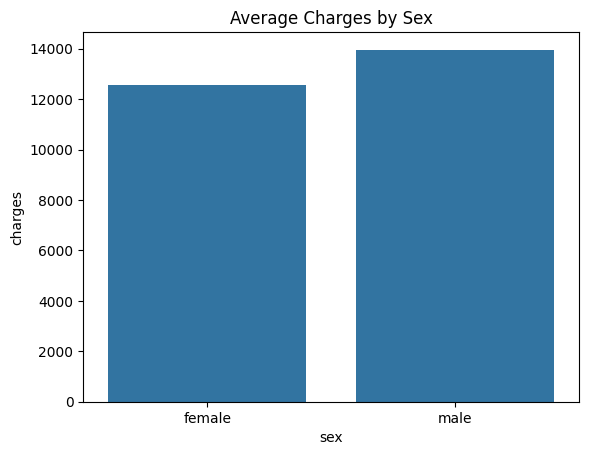

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='sex', y='charges', data=medical_df, estimator='mean', ci=None)
plt.title('Average Charges by Sex')
plt.show()


In [43]:
fig = px.bar(medical_df.groupby('children')['charges'].mean().reset_index(),
             x='children',
             y='charges',
             title='Average Charges by Number of Children')
fig.show()


In [44]:
fig = px.violin(medical_df,
                x='region',
                y='charges',
                color='region',
                box=True,
                title='Charges Distribution Across Regions')
fig.show()


In [45]:
fig = px.box(medical_df,
             x='region',
             y='charges',
             color='smoker',
             title='Charges by Region and Smoking Status')
fig.show()


In [48]:
fig = px.violin(
    medical_df,
    x='age',
    y='charges',
    color='region',
    title='Age vs. Charges colored by BMI',
)
fig.show()

In [54]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [55]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)